In [2]:
pip install --upgrade setuptools

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 80.4.0
    Uninstalling setuptools-80.4.0:
      Successfully uninstalled setuptools-80.4.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install git+https://github.com/ageitgey/face_recognition_models


  Cloning https://github.com/ageitgey/face_recognition_models to c:\users\wiam\appdata\local\temp\pip-req-build-vxajmzn0
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] Le fichier spécifié est introuvable while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [4]:
pip install face_recognition


Note: you may need to restart the kernel to use updated packages.


In [5]:
try:
    import face_recognition
    print("face_recognition module is installed and ready to use!")
except ImportError as e:
    print(f"Error: {e}")


face_recognition module is installed and ready to use!


In [1]:
"""conn = sqlite3.connect('authorized_faces.db')
cursor = conn.cursor()
# Exécution des requêtes ici...
conn.commit()
conn.close()  # Fermez la connexion"""


"conn = sqlite3.connect('authorized_faces.db')\ncursor = conn.cursor()\n# Exécution des requêtes ici...\nconn.commit()\nconn.close()  # Fermez la connexion"

In [ ]:
def list_authorized_individuals():
    conn = sqlite3.connect('ai_guard.db')
    cursor = conn.cursor()

    # Retrieve all authorized individuals
    cursor.execute('''
        SELECT * FROM authorized_individuals
    ''')

    individuals = cursor.fetchall()
    conn.close()

    print("Authorized Individuals:")
    for individual in individuals:
        print(f"ID: {individual[0]}, Name: {individual[1]}, Image Path: {individual[2]}")

Getting ready to capture images...
Please position yourself for the front_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing front_image...


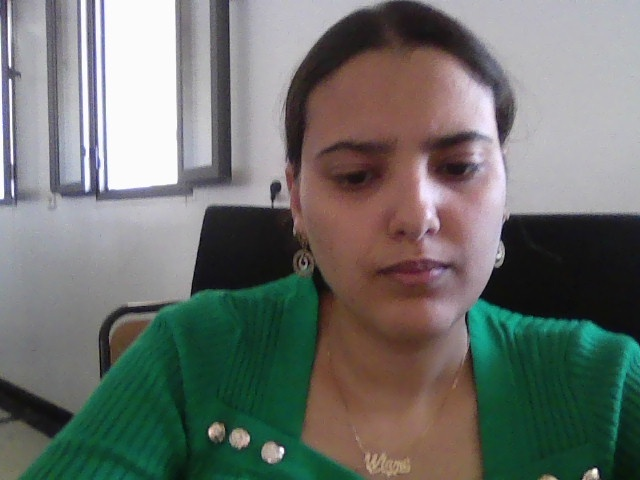

Image for h saved at C:/Users/Wiam/Desktop/AI_Guard/Students_data/h_2A\front_image.jpg.
Error saving to database: no such column: e_mail
front_image saved.
Deleted front_image_trial0.jpg.
Please turn to your left side.
Please position yourself for the left_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing left_side_image...


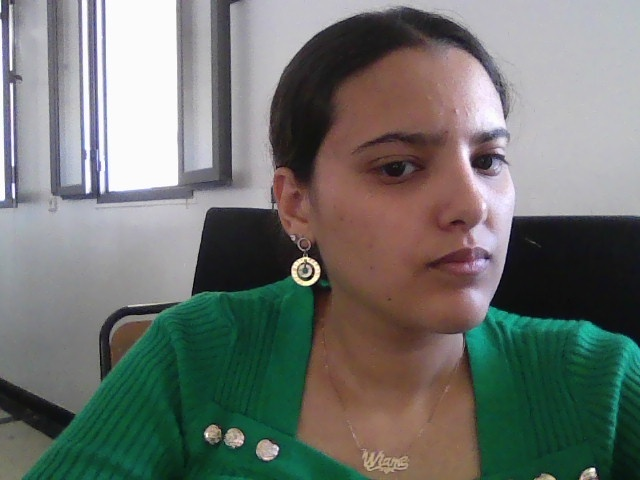

Image for h saved at C:/Users/Wiam/Desktop/AI_Guard/Students_data/h_2A\left_side_image.jpg.
Error saving to database: no such column: e_mail
left_side_image saved.
Deleted left_side_image_trial0.jpg.
Please turn to your right side.
Please position yourself for the right_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing right_side_image...


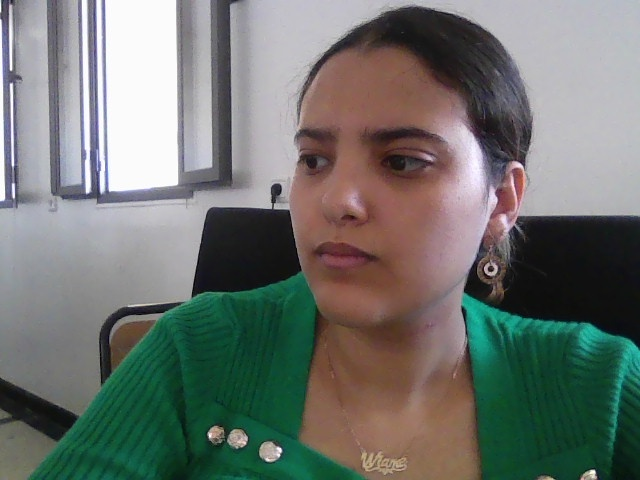

Image for h saved at C:/Users/Wiam/Desktop/AI_Guard/Students_data/h_2A\right_side_image.jpg.
Error saving to database: no such column: e_mail
right_side_image saved.
Deleted right_side_image_trial0.jpg.


In [19]:
import cv2
import os
import sqlite3
import time
from IPython.display import Image, display
import numpy as np

def update_db_schema():
    """Ensure the database schema has the necessary columns."""
    try:
        conn = sqlite3.connect('authorized_faces.db')
        cursor = conn.cursor()

        # Create table if it doesn't exist
        cursor.execute('''CREATE TABLE IF NOT EXISTS users (
                            name TEXT,
                            study_level TEXT,
                            e_mail TEXT,
                            front_image_path TEXT,
                            left_side_image_path TEXT,
                            right_side_image_path TEXT,
                            front_image BLOB,
                            left_side_image BLOB,
                            right_side_image BLOB
                        )''')

        # Add missing columns if they don't exist
        cursor.execute('''PRAGMA table_info(users)''')
        columns = [column[1] for column in cursor.fetchall()]

        if 'front_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN front_image_path TEXT''')
        if 'left_side_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN left_side_image_path TEXT''')
        if 'right_side_image_path' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN right_side_image_path TEXT''')
        if 'front_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN front_image BLOB''')
        if 'left_side_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN left_side_image BLOB''')
        if 'right_side_image' not in columns:
            cursor.execute('''ALTER TABLE users ADD COLUMN right_side_image BLOB''')

        conn.commit()
    except sqlite3.OperationalError as e:
        print(f"Error updating the database schema: {e}")
    finally:
        conn.close()

def save_image_to_folder_and_db(image_name, image_array, name, study_level, e_mail):
    """Saves the captured image to a folder and also stores the info in the SQLite database."""
    folder_path = f"C:/Users/Wiam/Desktop/AI_Guard/Students_data/{name}_{study_level}"
    
    # Create folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    # Construct the image file path and save the image
    image_path = os.path.join(folder_path, f"{image_name}.jpg")
    cv2.imwrite(image_path, image_array)
    print(f"Image for {name} saved at {image_path}.")
    
    # Convert the image to BLOB format for database storage
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_blob = img_encoded.tobytes()
    
    try:
        conn = sqlite3.connect('authorized_faces.db')
        cursor = conn.cursor()

        # Check if the user already exists in the database
        cursor.execute('''SELECT * FROM users WHERE name = ? AND study_level = ? AND e_mail = ?''', (name, study_level, e_mail))
        user = cursor.fetchone()
        
        if user:
            # Update existing user's images and paths
            if image_name == "front_image":
                cursor.execute('''UPDATE users SET front_image_path = ?, front_image = ? WHERE name = ? AND study_level = ? AND e_mail = ?''', 
                               (image_path, img_blob, name, study_level, e_mail))
            elif image_name == "left_side_image":
                cursor.execute('''UPDATE users SET left_side_image_path = ?, left_side_image = ? WHERE name = ? AND study_level = ? AND e_mail = ?''', 
                               (image_path, img_blob, name, study_level, e_mail))
            elif image_name == "right_side_image":
                cursor.execute('''UPDATE users SET right_side_image_path = ?, right_side_image = ? WHERE name = ? AND study_level = ? AND e_mail = ?''', 
                               (image_path, img_blob, name, study_level, e_mail))

            print(f"User {name} with study level {study_level} updated in the database.")
        else:
            # Insert new user info and images
            cursor.execute('''INSERT INTO users (name, study_level, e_mail, front_image_path, left_side_image_path, right_side_image_path,
                                                  front_image, left_side_image, right_side_image)
                              VALUES (?, ?, ?, ?, ?, ?, ?, ?)''', 
                           (name, study_level, e_mail, image_path, image_path, image_path, img_blob, img_blob, img_blob))

            print(f"User {name} with study level {study_level} and e_mail {e_mail} saved to database.")
        
        conn.commit()
        
    except sqlite3.OperationalError as e:
        print(f"Error saving to database: {e}")
    finally:
        # Close the database connection
        conn.close()

        # Adding a small delay to avoid database lock issues
        time.sleep(1)

def capture_and_store_images():
    """Handles the image capture process."""
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(name, study_level, e_mail, image_name):
        print(f"Please position yourself for the {image_name}. You will be able to see yourself on the camera.")
        
        # Store all captured frames to allow user to choose later if needed
        captured_images = []
        trial_images = []  # To keep track of trial images
        
        for trial in range(3):  # Limit to 3 trials
            print(f"Trial {trial + 1}/3: ")

            # Show live feed for the user to adjust posture
            while True:
                ret, frame = video_capture.read()
                if ret:
                    cv2.imshow(f'Capture {image_name} - Position Yourself', frame)
                    key = cv2.waitKey(1) & 0xFF
                    if key == ord('c'):  # Wait for the user to press 'c' to take the picture
                        break
                else:
                    print("Failed to capture image. Try again.")
                    continue
            
            # Now that the user is ready, capture the image
            print(f"Capturing {image_name}...")
            ret, frame = video_capture.read()
            if ret:
                # Save the image temporarily
                temp_image_path = f"{image_name}_trial{trial}.jpg"
                cv2.imwrite(temp_image_path, frame)
                trial_images.append(temp_image_path)  # Store the trial image paths
                cv2.destroyAllWindows()  # Close the live camera feed

                # Display the captured image to the user for feedback
                display(Image(filename=temp_image_path))
                confirm = input(f"Do you like this {image_name}? (y/n): ").lower()

                if confirm == 'y':
                    save_image_to_folder_and_db(image_name, frame, name, study_level, e_mail)
                    print(f"{image_name} saved.")
                                    
                    # Delete all other temporary images (trials)
                    for temp_image in trial_images:
                        if os.path.exists(temp_image):
                            os.remove(temp_image)
                            print(f"Deleted {temp_image}.")
                    break  # Exit the loop if user confirms the image
                else:
                    captured_images.append(frame)  # Store the rejected frame for later use
                    print(f"Retaking the {image_name} image.")  # Allow them to try again if they reject the photo
            else:
                print("Failed to capture image. Try again.")
                continue
        else:
            print(f"Failed to capture {image_name} after 3 trials.")

            # After 3 trials, ask the user to select one of the captured images
            print("You have failed to capture a satisfactory image after 3 trials.")
            print("You can now choose one of the images you took: ")
            for i, img in enumerate(captured_images):
                temp_image_path = f"{image_name}_final_choice_{i}.jpg"
                cv2.imwrite(temp_image_path, img)  # Save images for user to choose
                display(Image(filename=temp_image_path))
            
            choice = input(f"Please choose one image to save (enter the trial number: 0, 1, or 2): ").strip()
            if choice in ['0', '1', '2']:
                chosen_image = captured_images[int(choice)]
                save_image_to_folder_and_db(image_name, chosen_image, name, study_level, e_mail)
                print(f"Chosen {image_name} saved.")
                
                # Delete all other temporary images (trials and choices)
                for temp_image in trial_images:
                    if os.path.exists(temp_image):
                        os.remove(temp_image)
                        print(f"Deleted {temp_image}.")
                for temp_image in [f"{image_name}_final_choice_{i}.jpg" for i in range(3)]:
                    if os.path.exists(temp_image):
                        os.remove(temp_image)
                        print(f"Deleted {temp_image}.")
            else:
                print("Invalid choice. No image saved.")

    # User inputs their name and study level
    name = input("Enter the name of the person: ")
    study_level = input("Enter the study level (1A, 2A, 3A, 4A, 5A): ")
    e_mail = input("Enter your e_mail: ")

    # Capture front image
    capture_image(name, study_level, e_mail, "front_image")

    # Capture left side image
    print("Please turn to your left side.")
    time.sleep(2)
    capture_image(name, study_level, e_mail, "left_side_image")

    # Capture right side image
    print("Please turn to your right side.")
    time.sleep(2)
    capture_image(name, study_level, e_mail, "right_side_image")
    # Close the video capture
    video_capture.release()
    cv2.destroyAllWindows()

# Ensure the database schema is up to date
update_db_schema()

# Start capturing images
capture_and_store_images()


In [6]:
import cv2
import os
import sqlite3
import time
from IPython.display import Image, display # Keep if using Jupyter/IPython
import numpy as np

# --- Configuration (same as before, or adjust as needed) ---
DB_NAME = 'authorized_faces.db'
IMAGE_ROOT_FOLDER = "C:/Users/Wiam/Desktop/AI_Guard/Students_data" 

def initialize_database(db_path=DB_NAME, force_reset=False):
    """
    Initializes the SQLite database by creating the 'users' table with the required schema.

    Args:
        db_path (str): The path to the SQLite database file.
        force_reset (bool): If True, it will drop the 'users' table if it exists
                            before creating it anew. WARNING: This deletes all data in the table.
    """
    conn = None
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()

        if force_reset:
            cursor.execute("DROP TABLE IF EXISTS users")
            print(f"Table 'users' dropped (force_reset was True).")

        # Create the users table with a primary key, unique email, and columns for image paths and BLOBs
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS users (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                name TEXT NOT NULL,
                study_level TEXT,
                e_mail TEXT UNIQUE NOT NULL,
                front_image_path TEXT,
                left_side_image_path TEXT,
                right_side_image_path TEXT,
                front_image BLOB,
                left_side_image BLOB,
                right_side_image BLOB
            )
        ''')
        conn.commit()
        print(f"Database '{db_path}' initialized successfully. 'users' table is ready.")

    except sqlite3.Error as e:
        print(f"Error initializing the database '{db_path}': {e}")
        if conn:
            conn.rollback() # Rollback changes if an error occurs
    finally:
        if conn:
            conn.close()

# --- Example Usage ---
if __name__ == '__main__':
    # To initialize the database (creates if not exists, does nothing if table already exists correctly):
    initialize_database()


def save_image_to_folder_and_db(image_type, image_array, name, study_level, e_mail):
    """
    Saves the captured image to a folder and updates/inserts info in the SQLite database.
    image_type: 'front_image', 'left_side_image', or 'right_side_image'.
    """
    if not os.path.exists(IMAGE_ROOT_FOLDER):
        os.makedirs(IMAGE_ROOT_FOLDER)

    # Sanitize name and study_level for folder creation
    safe_name = "".join(c if c.isalnum() else "_" for c in name)
    safe_study_level = "".join(c if c.isalnum() else "_" for c in study_level)
    
    person_folder_name = f"{safe_name}_{safe_study_level}"
    folder_path = os.path.join(IMAGE_ROOT_FOLDER, person_folder_name)
    
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    timestamp = int(time.time())
    image_filename = f"{image_type}_{timestamp}.jpg"
    image_path = os.path.join(folder_path, image_filename)
    
    cv2.imwrite(image_path, image_array)
    print(f"Image ({image_type}) for {name} saved at {image_path}.")
    
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_blob = img_encoded.tobytes()
    
    conn = None
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()

        # Check if user exists (using e_mail as unique identifier)
        cursor.execute("SELECT id FROM users WHERE e_mail = ?", (e_mail,))
        user_row = cursor.fetchone()
        
        if user_row: # User exists, UPDATE their record
            user_id = user_row[0]
            # Update name and study_level if they've changed for this email (optional)
            cursor.execute("UPDATE users SET name = ?, study_level = ? WHERE id = ?", (name, study_level, user_id))

            # Update the specific image path and blob
            # Using f-strings for column names is generally okay if image_type is controlled internally
            # and not from direct user input that could be malicious.
            if image_type in ["front_image", "left_side_image", "right_side_image"]:
                path_column = f"{image_type}_path"
                blob_column = image_type # e.g., front_image, left_side_image
                cursor.execute(f"UPDATE users SET {path_column} = ?, {blob_column} = ? WHERE id = ?",
                               (image_path, img_blob, user_id))
                print(f"User {name} (e_mail: {e_mail}) updated with {image_type} in the database.")
            else:
                print(f"Error: Invalid image_type '{image_type}'.")
                return # Or raise an error

        else: # New user, INSERT a new record
            # Initialize all paths and blobs to None
            paths = {'front_image_path': None, 'left_side_image_path': None, 'right_side_image_path': None}
            blobs = {'front_image': None, 'left_side_image': None, 'right_side_image': None}

            # Set the current image's path and blob
            paths[f"{image_type}_path"] = image_path
            blobs[image_type] = img_blob
            
            cursor.execute('''INSERT INTO users (name, study_level, e_mail, 
                                                  front_image_path, left_side_image_path, right_side_image_path,
                                                  front_image, left_side_image, right_side_image)
                              VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)''', 
                           (name, study_level, e_mail, 
                            paths['front_image_path'], paths['left_side_image_path'], paths['right_side_image_path'],
                            blobs['front_image'], blobs['left_side_image'], blobs['right_side_image']))
            print(f"New user {name} (e_mail: {e_mail}) added to database with {image_type}.")
        
        conn.commit()
        
    except sqlite3.IntegrityError as e:
        # This can happen if e_mail is not unique and you try to insert a duplicate
        print(f"Database Integrity Error: {e}. Possibly a duplicate e_mail if it's set to UNIQUE.")
        if conn: conn.rollback()
    except sqlite3.Error as e:
        print(f"Database error: {e}")
        if conn: conn.rollback()
    finally:
        if conn:
            conn.close()

# Your capture_and_store_images function seems fine but ensure you call
# save_image_to_folder_and_db with the correct `image_type` string.
# Example change in your capture_image sub-function:
# save_image_to_folder_and_db("front_image", frame, name, study_level, e_mail)
# save_image_to_folder_and_db("left_side_image", frame, name, study_level, e_mail)
# save_image_to_folder_and_db("right_side_image", frame, name, study_level, e_mail)

Database 'authorized_faces.db' initialized successfully. 'users' table is ready.


Getting ready to capture images...
Please position yourself for the front_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing front_image...


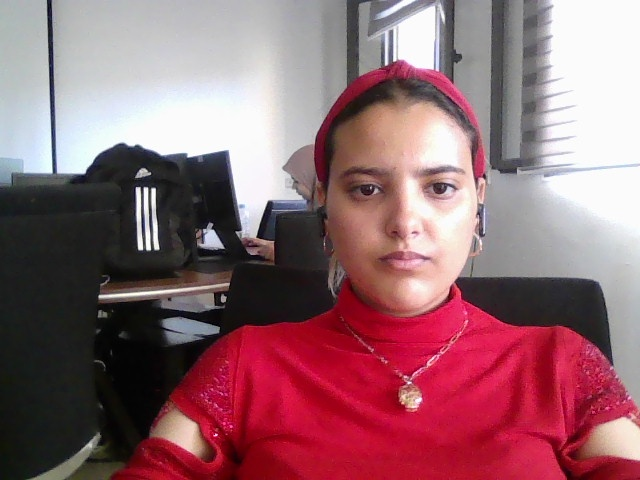

Image (front_image) for WIAME_EL_HAFID saved at C:/Users/Wiam/Desktop/AI_Guard/Students_data\WIAME_EL_HAFID_3A\front_image_1747850538.jpg.
New user WIAME_EL_HAFID (e_mail: wiame@ensam.ac.ma) added to database with front_image.
front_image saved.
Deleted front_image_trial0.jpg.
Please turn to your left side.
Please position yourself for the left_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing left_side_image...


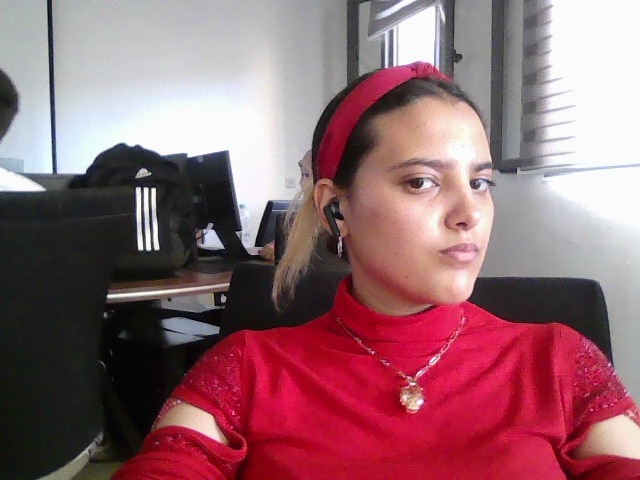

Image (left_side_image) for WIAME_EL_HAFID saved at C:/Users/Wiam/Desktop/AI_Guard/Students_data\WIAME_EL_HAFID_3A\left_side_image_1747850543.jpg.
User WIAME_EL_HAFID (e_mail: wiame@ensam.ac.ma) updated with left_side_image in the database.
left_side_image saved.
Deleted left_side_image_trial0.jpg.
Please turn to your right side.
Please position yourself for the right_side_image. You will be able to see yourself on the camera.
Trial 1/3: 
Capturing right_side_image...


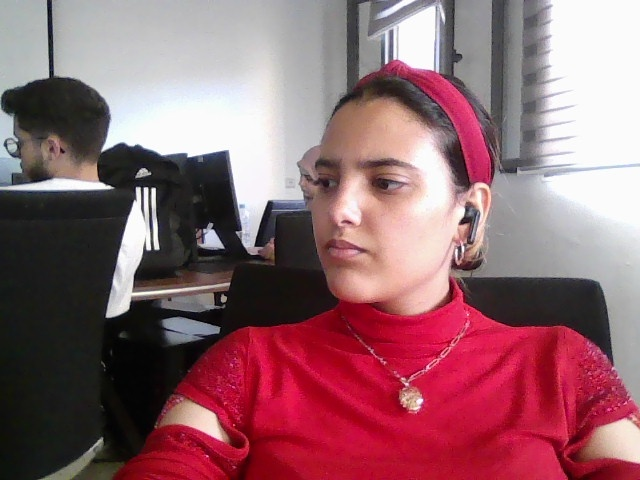

Image (right_side_image) for WIAME_EL_HAFID saved at C:/Users/Wiam/Desktop/AI_Guard/Students_data\WIAME_EL_HAFID_3A\right_side_image_1747850548.jpg.
User WIAME_EL_HAFID (e_mail: wiame@ensam.ac.ma) updated with right_side_image in the database.
right_side_image saved.
Deleted right_side_image_trial0.jpg.


In [7]:
def capture_and_store_images():
    """Handles the image capture process."""
    # Initialize video capture
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    # Give user time to get ready
    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(name, study_level, e_mail, image_name):
        print(f"Please position yourself for the {image_name}. You will be able to see yourself on the camera.")
        
        # Store all captured frames to allow user to choose later if needed
        captured_images = []
        trial_images = []  # To keep track of trial images
        
        for trial in range(3):  # Limit to 3 trials
            print(f"Trial {trial + 1}/3: ")

            # Show live feed for the user to adjust posture
            while True:
                ret, frame = video_capture.read()
                if ret:
                    cv2.imshow(f'Capture {image_name} - Position Yourself', frame)
                    key = cv2.waitKey(1) & 0xFF
                    if key == ord('c'):  # Wait for the user to press 'c' to take the picture
                        break
                else:
                    print("Failed to capture image. Try again.")
                    continue
            
            # Now that the user is ready, capture the image
            print(f"Capturing {image_name}...")
            ret, frame = video_capture.read()
            if ret:
                # Save the image temporarily
                temp_image_path = f"{image_name}_trial{trial}.jpg"
                cv2.imwrite(temp_image_path, frame)
                trial_images.append(temp_image_path)  # Store the trial image paths
                cv2.destroyAllWindows()  # Close the live camera feed

                # Display the captured image to the user for feedback
                display(Image(filename=temp_image_path))
                confirm = input(f"Do you like this {image_name}? (y/n): ").lower()

                if confirm == 'y':
                    save_image_to_folder_and_db(image_name, frame, name, study_level, e_mail)
                    print(f"{image_name} saved.")
                                    
                    # Delete all other temporary images (trials)
                    for temp_image in trial_images:
                        if os.path.exists(temp_image):
                            os.remove(temp_image)
                            print(f"Deleted {temp_image}.")
                    break  # Exit the loop if user confirms the image
                else:
                    captured_images.append(frame)  # Store the rejected frame for later use
                    print(f"Retaking the {image_name} image.")  # Allow them to try again if they reject the photo
            else:
                print("Failed to capture image. Try again.")
                continue
        else:
            print(f"Failed to capture {image_name} after 3 trials.")

            # After 3 trials, ask the user to select one of the captured images
            print("You have failed to capture a satisfactory image after 3 trials.")
            print("You can now choose one of the images you took: ")
            for i, img in enumerate(captured_images):
                temp_image_path = f"{image_name}_final_choice_{i}.jpg"
                cv2.imwrite(temp_image_path, img)  # Save images for user to choose
                display(Image(filename=temp_image_path))
            
            choice = input(f"Please choose one image to save (enter the trial number: 0, 1, or 2): ").strip()
            if choice in ['0', '1', '2']:
                chosen_image = captured_images[int(choice)]
                save_image_to_folder_and_db(image_name, chosen_image, name, study_level, e_mail)
                print(f"Chosen {image_name} saved.")
                
                # Delete all other temporary images (trials and choices)
                for temp_image in trial_images:
                    if os.path.exists(temp_image):
                        os.remove(temp_image)
                        print(f"Deleted {temp_image}.")
                for temp_image in [f"{image_name}_final_choice_{i}.jpg" for i in range(3)]:
                    if os.path.exists(temp_image):
                        os.remove(temp_image)
                        print(f"Deleted {temp_image}.")
            else:
                print("Invalid choice. No image saved.")

    # User inputs their name and study level
    name = input("Enter the name of the person: ")
    study_level = input("Enter the study level (1A, 2A, 3A, 4A, 5A): ")
    e_mail = input("Enter your e_mail: ")

    # Capture front image
    capture_image(name, study_level, e_mail, "front_image")

    # Capture left side image
    print("Please turn to your left side.")
    time.sleep(2)
    capture_image(name, study_level, e_mail, "left_side_image")

    # Capture right side image
    print("Please turn to your right side.")
    time.sleep(2)
    capture_image(name, study_level, e_mail, "right_side_image")
    # Close the video capture
    video_capture.release()
    cv2.destroyAllWindows()

# Ensure the database schema is up to date
update_db_schema()

# Start capturing images
capture_and_store_images()


In [9]:
# --- NECESSARY IMPORTS ---
import cv2
import os
import sqlite3
import time
import numpy as np
import face_recognition  # <--- THIS LINE IS CRUCIAL AND MUST BE PRESENT
from IPython.display import Image, display # If using Jupyter/IPython

# --- 1. CONFIGURATION ---
DB_NAME = 'authorized_faces.db'
IMAGE_ROOT_FOLDER = "C:/Users/Wiam/Desktop/AI_Guard/Students_data" # Make sure this path is correct for you

# Face Recognition Config
RECOGNITION_RESIZE_FACTOR = 0.25 # Resize frame for faster processing (e.g., 0.25 for 1/4 size)
RECOGNITION_DETECTION_MODEL = "hog" # "hog" (faster CPU) or "cnn" (more accurate, slower on CPU)
DISTANCE_THRESHOLD = 0.55 # Lower value = stricter matching. Tune this. (0.4 to 0.6 is common)
UNKNOWN_FACE_COLOR = (0, 0, 255) # Red for unknown
KNOWN_FACE_COLOR = (0, 255, 0)   # Green for known
FONT = cv2.FONT_HERSHEY_DUPLEX

# --- 2. GLOBAL VARIABLES for Face Recognition ---
known_face_encodings = []
known_face_names = [] # Will store names (or emails) corresponding to encodings

# --- 3. DATABASE FUNCTIONS ---
def initialize_database(db_path=DB_NAME, force_reset=False):
    """Initializes the SQLite database by creating the 'users' table."""
    conn = None
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        if force_reset:
            cursor.execute("DROP TABLE IF EXISTS users")
            print(f"Table 'users' dropped (force_reset was True).")
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS users (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                name TEXT NOT NULL,
                study_level TEXT,
                e_mail TEXT UNIQUE NOT NULL,
                front_image_path TEXT,
                left_side_image_path TEXT,
                right_side_image_path TEXT,
                front_image BLOB,
                left_side_image BLOB,
                right_side_image BLOB
            )
        ''')
        conn.commit()
        print(f"Database '{db_path}' initialized. 'users' table is ready.")
    except sqlite3.Error as e:
        print(f"Error initializing database '{db_path}': {e}")
        if conn: conn.rollback()
    finally:
        if conn: conn.close()

def save_image_to_folder_and_db(image_type, image_array, name, study_level, e_mail):
    """Saves image to folder and updates/inserts info in SQLite database."""
    if not os.path.exists(IMAGE_ROOT_FOLDER):
        os.makedirs(IMAGE_ROOT_FOLDER)
    
    safe_name = "".join(c if c.isalnum() else "_" for c in name)
    safe_study_level = "".join(c if c.isalnum() else "_" for c in study_level)
    person_folder_name = f"{safe_name}_{safe_study_level}"
    folder_path = os.path.join(IMAGE_ROOT_FOLDER, person_folder_name)
    
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    timestamp = int(time.time())
    image_filename = f"{image_type}_{timestamp}.jpg" # e.g., front_image_1678886400.jpg
    image_path = os.path.join(folder_path, image_filename)
    
    cv2.imwrite(image_path, image_array)
    print(f"Image ({image_type}) for {name} saved to: {image_path}")
    
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_blob = img_encoded.tobytes()
    
    conn = None
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()
        cursor.execute("SELECT id FROM users WHERE e_mail = ?", (e_mail,))
        user_row = cursor.fetchone()
        
        if user_row: # User exists, UPDATE
            user_id = user_row[0]
            cursor.execute("UPDATE users SET name = ?, study_level = ? WHERE id = ?", (name, study_level, user_id))
            path_column = f"{image_type}_path"
            blob_column = image_type
            cursor.execute(f"UPDATE users SET {path_column} = ?, {blob_column} = ? WHERE id = ?",
                           (image_path, img_blob, user_id))
            print(f"User {name} (e_mail: {e_mail}) updated with {image_type} in database.")
        else: # New user, INSERT
            paths = {'front_image_path': None, 'left_side_image_path': None, 'right_side_image_path': None}
            blobs = {'front_image': None, 'left_side_image': None, 'right_side_image': None}
            paths[f"{image_type}_path"] = image_path
            blobs[image_type] = img_blob
            cursor.execute('''INSERT INTO users (name, study_level, e_mail, 
                                                  front_image_path, left_side_image_path, right_side_image_path,
                                                  front_image, left_side_image, right_side_image)
                              VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)''', 
                           (name, study_level, e_mail, 
                            paths['front_image_path'], paths['left_side_image_path'], paths['right_side_image_path'],
                            blobs['front_image'], blobs['left_side_image'], blobs['right_side_image']))
            print(f"New user {name} (e_mail: {e_mail}) added to database with {image_type}.")
        conn.commit()
    except sqlite3.IntegrityError as e:
        print(f"Database Integrity Error: {e}. (Perhaps e_mail '{e_mail}' already exists with different details, or {image_type} is invalid).")
        if conn: conn.rollback()
    except sqlite3.Error as e:
        print(f"Database error during save/update for {e_mail}: {e}")
        if conn: conn.rollback()
    finally:
        if conn: conn.close()

# --- 4. YOUR IMAGE CAPTURE FUNCTION ---
# (Paste your `capture_and_store_images` function here)
# Make sure its sub-function `capture_image` calls the `save_image_to_folder_and_db` above
# correctly. For example:
#
#   def capture_image(name, study_level, e_mail, image_type_capture): # Renamed image_name to image_type_capture for clarity
#       ...
#       # When user confirms 'y':
#       save_image_to_folder_and_db(image_type_capture, frame, name, study_level, e_mail) # Ensure image_type_capture is "front_image", "left_side_image", or "right_side_image"
#       ...
#
# And ensure the main `capture_and_store_images` calls `capture_image` with these specific strings:
#
#   capture_image(name, study_level, e_mail, "front_image")
#   ...
#   capture_image(name, study_level, e_mail, "left_side_image")
#   ...
#   capture_image(name, study_level, e_mail, "right_side_image")

# >>> PASTE YOUR `capture_and_store_images` FUNCTION HERE <<<
# For demonstration, I'll include a simplified version. Replace with your full one.
def capture_and_store_images():
    """Handles the image capture process. (YOUR FULL VERSION GOES HERE)"""
    video_capture = cv2.VideoCapture(0)
    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    print("Getting ready to capture images...")
    time.sleep(1)

    def capture_single_image_view(name, study_level, e_mail, image_type_to_capture, instruction):
        print(instruction)
        time.sleep(1) # Give user time to adjust
        
        max_trials = 3
        for trial in range(max_trials):
            print(f"Trial {trial + 1}/{max_trials} for {image_type_to_capture}. Look at camera. Press 'c' to capture, 's' to skip this view.")
            
            # Show live feed
            while True:
                ret, frame = video_capture.read()
                if not ret:
                    print("Failed to get frame from camera.")
                    time.sleep(0.5)
                    continue
                
                cv2.imshow(f'Capture: {image_type_to_capture} - Press "c" or "s"', frame)
                key = cv2.waitKey(1) & 0xFF
                
                if key == ord('c'): # Capture
                    cv2.destroyAllWindows() # Close the preview
                    # Display captured image for confirmation (optional, adapt from your code)
                    print(f"Image for {image_type_to_capture} captured.")
                    # temp_image_path = f"{image_type_to_capture}_temp.jpg" # If using IPython display
                    # cv2.imwrite(temp_image_path, frame)
                    # display(Image(filename=temp_image_path))
                    # confirm = input("Keep this image? (y/n): ").lower()
                    # if os.path.exists(temp_image_path): os.remove(temp_image_path)

                    # For simplicity here, we assume 'y'
                    # if confirm == 'y':
                    save_image_to_folder_and_db(image_type_to_capture, frame, name, study_level, e_mail)
                    return True # Success for this view
                    # else:
                    #     print("Image discarded. Retrying...")
                    #     break # Break from imshow loop to restart trial
                elif key == ord('s'): # Skip
                    cv2.destroyAllWindows()
                    print(f"Skipped {image_type_to_capture}.")
                    return False # Skipped this view
                elif key == ord('q'): # Quit capture process
                    cv2.destroyAllWindows()
                    print("Capture process aborted by user.")
                    return "abort"

            if trial < max_trials - 1: # If not the last trial and image was not kept
                 print("Retrying...")
            # If imshow loop broken by 'c' but image not kept, it will retry

        cv2.destroyAllWindows()
        print(f"Failed to capture a satisfactory {image_type_to_capture} after {max_trials} trials.")
        return False # Failed for this view

    name = input("Enter the name of the person: ").strip()
    study_level = input("Enter the study level (e.g., 1A, 2A): ").strip()
    e_mail = input("Enter e_mail (must be unique): ").strip()

    if not name or not e_mail:
        print("Name and e-mail cannot be empty. Aborting.")
        video_capture.release()
        cv2.destroyAllWindows()
        return

    views_to_capture = [
        ("front_image", "Position for FRONT view."),
        ("left_side_image", "Turn to your LEFT for LEFT SIDE view."),
        ("right_side_image", "Turn to your RIGHT for RIGHT SIDE view.")
    ]

    for view_type, instruction_text in views_to_capture:
        result = capture_single_image_view(name, study_level, e_mail, view_type, instruction_text)
        if result == "abort":
            break # User aborted entire capture

    video_capture.release()
    cv2.destroyAllWindows()
    print("Finished image capture session.")

In [10]:
import face_recognition
print(face_recognition.__version__)

1.2.3


In [ ]:


# --- 5. FACE RECOGNITION CORE FUNCTIONS ---
def load_known_faces_from_db():
    """Loads face encodings and names from the SQLite database."""
    global known_face_encodings, known_face_names
    known_face_encodings = []
    known_face_names = []
    
    conn = None
    print("Loading known faces from database for recognition...")
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()
        # Fetch relevant data: name/email for identification, and image paths for encoding.
        # We prioritize front_image_path here. You could extend to use all 3 views
        # per person to get multiple encodings, which can improve recognition.
        cursor.execute("SELECT name, e_mail, front_image_path, left_side_image_path, right_side_image_path FROM users")
        users_data = cursor.fetchall()

        if not users_data:
            print("Database contains no user records or no image paths.")
            return

        for user_row in users_data:
            db_name, db_email, front_path, left_path, right_path = user_row
            
            # We'll use the name for display, but you could use email if names aren't unique.
            identifier_name = db_name 
            
            image_paths_to_try = [front_path, left_path, right_path] # Prioritize front, then others
            encoded_for_user = False

            for img_path in image_paths_to_try:
                if img_path and os.path.exists(img_path):
                    try:
                        print(f"Processing image: {img_path} for {identifier_name}")
                        image_rgb = face_recognition.load_image_file(img_path) # Loads as RGB
                        
                        # It's good to detect faces first, especially if DB images might not be perfectly cropped
                        face_locations = face_recognition.face_locations(image_rgb, model=RECOGNITION_DETECTION_MODEL)
                        
                        if face_locations: # If at least one face is found
                            # We assume the first face found is the person of interest for DB images
                            face_encs = face_recognition.face_encodings(image_rgb, known_face_locations=face_locations)
                            if face_encs:
                                known_face_encodings.append(face_encs[0])
                                known_face_names.append(identifier_name)
                                print(f"Loaded encoding from {os.path.basename(img_path)} for {identifier_name} (e_mail: {db_email}).")
                                encoded_for_user = True
                                break # Got at least one good encoding for this user, move to next user
                                        # If you want all 3 views encoded, remove this break and append all
                            else:
                                print(f"Warning: No encoding generated from {os.path.basename(img_path)} for {identifier_name}, though face was located.")
                        else:
                            print(f"Warning: No face detected in {os.path.basename(img_path)} for {identifier_name}.")
                    except Exception as e:
                        print(f"Error loading or encoding image {img_path} for {identifier_name}: {e}")
                # else:
                #     if img_path: print(f"Image path {img_path} not found for {identifier_name}.")

            if not encoded_for_user:
                 print(f"Could not load any valid face encoding for user {identifier_name} (e_mail: {db_email}).")


    except sqlite3.Error as e:
        print(f"Database error while loading faces for recognition: {e}")
    finally:
        if conn: conn.close()

    if not known_face_encodings:
        print("No known face encodings loaded. Recognition may not work.")
    else:
        print(f"Total {len(known_face_encodings)} known face encodings loaded.")

def recognize_faces_in_webcam():
    """Recognizes faces from webcam stream by comparing with loaded known faces."""
    if not known_face_encodings:
        print("No known faces loaded. Please add users to database and load them (Option 2).")
        return

    video_capture = cv2.VideoCapture(0)
    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    print("Starting real-time face recognition. Press 'q' in the webcam window to quit.")
    while True:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Can't receive frame. Exiting.")
            break

        small_frame = cv2.resize(frame, (0, 0), fx=RECOGNITION_RESIZE_FACTOR, fy=RECOGNITION_RESIZE_FACTOR)
        rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)

        current_face_locations = face_recognition.face_locations(rgb_small_frame, model=RECOGNITION_DETECTION_MODEL)
        current_face_encodings = face_recognition.face_encodings(rgb_small_frame, current_face_locations)

        face_names_in_frame = []
        for face_encoding in current_face_encodings:
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=DISTANCE_THRESHOLD)
            name_for_display = "Unknown"
            color = UNKNOWN_FACE_COLOR

            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            if len(face_distances) > 0:
                best_match_index = np.argmin(face_distances)
                if matches[best_match_index]:
                    name_for_display = known_face_names[best_match_index]
                    color = KNOWN_FACE_COLOR
            
            face_names_in_frame.append((name_for_display, color))

        for (top, right, bottom, left), (name, color) in zip(current_face_locations, face_names_in_frame):
            top = int(top / RECOGNITION_RESIZE_FACTOR)
            right = int(right / RECOGNITION_RESIZE_FACTOR)
            bottom = int(bottom / RECOGNITION_RESIZE_FACTOR)
            left = int(left / RECOGNITION_RESIZE_FACTOR)

            cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
            cv2.rectangle(frame, (left, bottom - 25), (right, bottom), color, cv2.FILLED) # Smaller label box
            cv2.putText(frame, name, (left + 6, bottom - 6), FONT, 0.8, (255, 255, 255), 1) # Smaller font

        cv2.imshow('Face Recognition - Press "q" to quit', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()
    print("Face recognition stopped.")

# --- 6. MAIN APPLICATION MENU ---
def main_notebook_app():
    """Displays main menu and handles user choices."""
    initialize_database() # Ensures DB and table exist
    load_known_faces_from_db() # Attempt to load any existing faces on startup

    while True:
        print("\n--- Face Recognition System ---")
        print("1. Add/Update Person in Database (Capture Images)")
        print("2. Load/Refresh Known Faces from Database")
        print("3. Start Real-time Face Recognition")
        print("4. Reset Database (WARNING: Deletes all users!)")
        print("5. Exit")

        choice = input("Enter your choice (1-5): ")

        if choice == '1':
            capture_and_store_images() # YOUR FUNCTION WILL BE CALLED HERE
            load_known_faces_from_db() # Reload faces after potential additions/updates
        elif choice == '2':
            load_known_faces_from_db()
        elif choice == '3':
            recognize_faces_in_webcam()
        elif choice == '4':
            confirm = input("ARE YOU SURE you want to reset the database? All user data will be lost! (yes/no): ").lower()
            if confirm == 'yes':
                initialize_database(force_reset=True)
                load_known_faces_from_db() # Reload (will be empty)
                print("Database has been reset.")
            else:
                print("Database reset cancelled.")
        elif choice == '5':
            print("Exiting application.")
            break
        else:
            print("Invalid choice. Please try again.")

# --- 7. SCRIPT EXECUTION ---
if __name__ == '__main__':
    # This ensures the IMAGE_ROOT_FOLDER exists when the script starts
    if not os.path.exists(IMAGE_ROOT_FOLDER):
        try:
            os.makedirs(IMAGE_ROOT_FOLDER)
            print(f"Created image storage directory: {IMAGE_ROOT_FOLDER}")
        except OSError as e:
            print(f"Error creating image storage directory {IMAGE_ROOT_FOLDER}: {e}")
            print("Please create this directory manually or check permissions.")
            # exit() # Optionally exit if directory creation fails

    main_notebook_app()

Database 'authorized_faces.db' initialized. 'users' table is ready.
Loading known faces from database for recognition...
Processing image: C:/Users/Wiam/Desktop/AI_Guard/Students_data\WIAME_EL_HAFID_3A\front_image_1747850538.jpg for WIAME_EL_HAFID
Loaded encoding from front_image_1747850538.jpg for WIAME_EL_HAFID (e_mail: wiame@ensam.ac.ma).
Total 1 known face encodings loaded.

--- Face Recognition System ---
1. Add/Update Person in Database (Capture Images)
2. Load/Refresh Known Faces from Database
3. Start Real-time Face Recognition
4. Reset Database (WARNING: Deletes all users!)
5. Exit
Loading known faces from database for recognition...
Processing image: C:/Users/Wiam/Desktop/AI_Guard/Students_data\WIAME_EL_HAFID_3A\front_image_1747850538.jpg for WIAME_EL_HAFID
Loaded encoding from front_image_1747850538.jpg for WIAME_EL_HAFID (e_mail: wiame@ensam.ac.ma).
Total 1 known face encodings loaded.

--- Face Recognition System ---
1. Add/Update Person in Database (Capture Images)
2. Loa

In [5]:
# --- NECESSARY IMPORTS ---
import cv2
import os
import sqlite3
import time
import numpy as np
import face_recognition # ENSURE THIS IS IMPORTED
from IPython.display import Image, display # Keep if using Jupyter/IPython

# --- 1. CONFIGURATION ---
DB_NAME = 'authorized_faces.db'
IMAGE_ROOT_FOLDER = "C:/Users/Wiam/Desktop/AI_Guard/Students_data" # YOUR PATH

RECOGNITION_RESIZE_FACTOR = 1
RECOGNITION_DETECTION_MODEL = "hog"
DISTANCE_THRESHOLD = 0.55
UNKNOWN_FACE_COLOR = (0, 0, 255)
KNOWN_FACE_COLOR = (0, 255, 0)
FONT = cv2.FONT_HERSHEY_DUPLEX

# --- 2. GLOBAL VARIABLES for Face Recognition ---
known_face_encodings = []
known_face_names = []

# --- 3. DATABASE FUNCTIONS ---
def initialize_database(db_path=DB_NAME, force_reset=False):
    """Initializes the SQLite database by creating the 'users' table."""
    conn = None
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        if force_reset:
            cursor.execute("DROP TABLE IF EXISTS users")
            print(f"Table 'users' dropped (force_reset was True).")
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS users (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                name TEXT NOT NULL,
                study_level TEXT,
                e_mail TEXT UNIQUE NOT NULL,
                front_image_path TEXT,
                left_side_image_path TEXT,
                right_side_image_path TEXT,
                front_image BLOB,
                left_side_image BLOB,
                right_side_image BLOB
            )
        ''')
        conn.commit()
        print(f"Database '{db_path}' initialized. 'users' table is ready.")
    except sqlite3.Error as e:
        print(f"Error initializing database '{db_path}': {e}")
        if conn: conn.rollback()
    finally:
        if conn: conn.close()

# THIS IS MY REVISED save_image_to_folder_and_db. YOUR CAPTURE FUNCTION WILL CALL THIS.
def save_image_to_folder_and_db(image_type, image_array, name, study_level, e_mail):
    """Saves image to folder and updates/inserts info in SQLite database.
    image_type: "front_image", "left_side_image", or "right_side_image"
    """
    if not os.path.exists(IMAGE_ROOT_FOLDER):
        os.makedirs(IMAGE_ROOT_FOLDER)
    
    safe_name = "".join(c if c.isalnum() else "_" for c in name)
    safe_study_level = "".join(c if c.isalnum() else "_" for c in study_level)
    person_folder_name = f"{safe_name}_{safe_study_level}"
    folder_path = os.path.join(IMAGE_ROOT_FOLDER, person_folder_name)
    
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    timestamp = int(time.time())
    image_filename = f"{image_type}_{timestamp}.jpg"
    image_path = os.path.join(folder_path, image_filename)
    
    cv2.imwrite(image_path, image_array)
    print(f"Image ({image_type}) for {name} saved to: {image_path}")
    
    _, img_encoded = cv2.imencode('.jpg', image_array)
    img_blob = img_encoded.tobytes()
    
    conn = None
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()
        cursor.execute("SELECT id FROM users WHERE e_mail = ?", (e_mail,))
        user_row = cursor.fetchone()
        
        if user_row: # User exists, UPDATE
            user_id = user_row[0]
            cursor.execute("UPDATE users SET name = ?, study_level = ? WHERE id = ?", (name, study_level, user_id))
            path_column = f"{image_type}_path" # e.g., front_image_path
            blob_column = image_type          # e.g., front_image
            cursor.execute(f"UPDATE users SET {path_column} = ?, {blob_column} = ? WHERE id = ?",
                           (image_path, img_blob, user_id))
            print(f"User {name} (e_mail: {e_mail}) updated with {image_type} in database.")
        else: # New user, INSERT
            paths = {'front_image_path': None, 'left_side_image_path': None, 'right_side_image_path': None}
            blobs = {'front_image': None, 'left_side_image': None, 'right_side_image': None}
            paths[f"{image_type}_path"] = image_path
            blobs[image_type] = img_blob
            cursor.execute('''INSERT INTO users (name, study_level, e_mail, 
                                                  front_image_path, left_side_image_path, right_side_image_path,
                                                  front_image, left_side_image, right_side_image)
                              VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)''', 
                           (name, study_level, e_mail, 
                            paths['front_image_path'], paths['left_side_image_path'], paths['right_side_image_path'],
                            blobs['front_image'], blobs['left_side_image'], blobs['right_side_image']))
            print(f"New user {name} (e_mail: {e_mail}) added to database with {image_type}.")
        conn.commit()
    except sqlite3.IntegrityError as e:
        print(f"Database Integrity Error for {e_mail} with {image_type}: {e}.")
        if conn: conn.rollback()
    except sqlite3.Error as e:
        print(f"Database error during save/update for {e_mail} with {image_type}: {e}")
        if conn: conn.rollback()
    finally:
        if conn: conn.close()

# --- 4. YOUR IMAGE CAPTURE FUNCTION ---
# >>> PASTE YOUR `capture_and_store_images` FUNCTION HERE <<<
# Make sure its sub-function `capture_image` calls the `save_image_to_folder_and_db`
# function defined *ABOVE* this section.
#
# Example of how your `capture_image` sub-function should call it:
#
# def capture_image(name, study_level, e_mail, image_name_from_your_func): # image_name_from_your_func will be "front_image", "left_side_image", etc.
#     # ... your logic for trials, display, confirmation ...
#     if confirm == 'y':
#         # THIS IS THE CRITICAL CALL:
#         save_image_to_folder_and_db(image_name_from_your_func, frame_array, name, study_level, e_mail)
#         # The first argument "image_name_from_your_func" MUST be "front_image", "left_side_image", or "right_side_image"
#         # for my save_image_to_folder_and_db to work correctly.
#         print(f"{image_name_from_your_func} saved.")
#     # ... rest of your logic ...

# PASTE YOUR FUNCTION `capture_and_store_images` (and its helper `capture_image`) HERE:
def capture_and_store_images():
    """Handles the image capture process."""
    video_capture = cv2.VideoCapture(0)

    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    print("Getting ready to capture images...")
    time.sleep(2)

    def capture_image(name, study_level, e_mail, image_name_param): # image_name_param is "front_image", etc.
        print(f"Please position yourself for the {image_name_param}. You will be able to see yourself on the camera.")
        
        captured_images_for_choice = [] # Store frames if all trials fail
        trial_temp_image_paths = []  # To keep track of temp image files from trials
        
        for trial in range(3):
            print(f"Trial {trial + 1}/3 for {image_name_param}: ")

            while True: # Live feed loop for user to press 'c'
                ret, frame = video_capture.read()
                if ret:
                    cv2.imshow(f'Capture {image_name_param} - Position Yourself, Press "c" to snap', frame)
                    key = cv2.waitKey(1) & 0xFF
                    if key == ord('c'):
                        break 
                    elif key == ord('q'): # Allow quitting the entire capture process
                        print("Capture aborted by user ('q' pressed).")
                        cv2.destroyAllWindows()
                        return "abort_all" 
                else:
                    print("Failed to capture image from feed. Try again.")
                    time.sleep(0.5) # Brief pause
                    continue # Retry getting frame
            
            # Image snapped, now process it
            # No need for another video_capture.read() here, 'frame' from above is the snapped one.
            # ret, frame = video_capture.read() # This was redundant if 'c' breaks from live feed
            
            cv2.destroyAllWindows() # Close the live camera feed for this trial

            temp_image_display_path = f"{image_name_param}_trial{trial}_display.jpg"
            cv2.imwrite(temp_image_display_path, frame)
            trial_temp_image_paths.append(temp_image_display_path)
            
            print(f"Displaying captured image for {image_name_param} (Trial {trial + 1}):")
            display(Image(filename=temp_image_display_path)) # For Jupyter/IPython
            confirm = input(f"Do you like this {image_name_param}? (y/n/q to quit all): ").lower()

            if confirm == 'y':
                # Call the robust save_image_to_folder_and_db
                save_image_to_folder_and_db(image_name_param, frame, name, study_level, e_mail)
                # print(f"{image_name_param} saved.") # save_image_to_folder_and_db already prints
                for temp_path in trial_temp_image_paths: # Cleanup all trial images for this view
                    if os.path.exists(temp_path): os.remove(temp_path)
                return "success" # Signal success for this image view
            elif confirm == 'q':
                print("Capture aborted by user ('q' pressed during confirmation).")
                for temp_path in trial_temp_image_paths: # Cleanup
                    if os.path.exists(temp_path): os.remove(temp_path)
                return "abort_all"
            else: # 'n' or other input
                captured_images_for_choice.append(frame) # Store the rejected frame for later
                print(f"Retaking the {image_name_param} image.")
        
        # All trials for this view failed user confirmation
        print(f"Failed to get a satisfactory {image_name_param} after 3 trials.")
        for temp_path in trial_temp_image_paths: # Cleanup trial display images
            if os.path.exists(temp_path): os.remove(temp_path)

        if captured_images_for_choice: # If any images were captured but rejected
            print("You can now choose one of the images you took for this view:")
            final_choice_temp_paths = []
            for i, img_frame in enumerate(captured_images_for_choice):
                temp_path = f"{image_name_param}_final_choice_{i}.jpg"
                cv2.imwrite(temp_path, img_frame)
                final_choice_temp_paths.append(temp_path)
                print(f"Option {i}:")
                display(Image(filename=temp_path))
            
            try:
                choice_input = input(f"Please choose one image to save for {image_name_param} (enter number 0, 1, or 2, or 's' to skip this view): ").strip().lower()
                if choice_input == 's':
                    print(f"Skipped saving {image_name_param}.")
                    for temp_path in final_choice_temp_paths: # Cleanup final choice images
                         if os.path.exists(temp_path): os.remove(temp_path)
                    return "skipped_view"
                
                choice_idx = int(choice_input)
                if 0 <= choice_idx < len(captured_images_for_choice):
                    chosen_image_frame = captured_images_for_choice[choice_idx]
                    save_image_to_folder_and_db(image_name_param, chosen_image_frame, name, study_level, e_mail)
                    # print(f"Chosen {image_name_param} saved.")
                    for temp_path in final_choice_temp_paths: # Cleanup
                         if os.path.exists(temp_path): os.remove(temp_path)
                    return "success"
                else:
                    print("Invalid choice number.")
            except ValueError:
                print("Invalid input for choice.")
        
        print(f"No image saved for {image_name_param}.")
        for temp_path in final_choice_temp_paths: # Ensure cleanup if any error before this
            if os.path.exists(temp_path): os.remove(temp_path)
        return "failed_view" # Failed to get an image for this view


    name = input("Enter the name of the person: ").strip()
    study_level = input("Enter the study level (1A, 2A, 3A, 4A, 5A): ").strip()
    e_mail = input("Enter e_mail (must be unique): ").strip()

    if not name or not e_mail or not study_level:
        print("Name, study level, and e-mail cannot be empty. Aborting capture.")
        video_capture.release()
        cv2.destroyAllWindows()
        return

    image_types_to_capture = [
        ("front_image", "Please position for the FRONT view."),
        ("left_side_image", "Please turn to your LEFT for the LEFT SIDE view."),
        ("right_side_image", "Please turn to your RIGHT for the RIGHT SIDE view.")
    ]

    for img_type, instruction in image_types_to_capture:
        print(f"\n--- Capturing {img_type} ---")
        time.sleep(1) # Give user a moment
        capture_status = capture_image(name, study_level, e_mail, img_type)
        if capture_status == "abort_all":
            print("Image capture process aborted.")
            break # Exit the loop over image_types_to_capture
        elif capture_status == "success":
            print(f"Successfully captured and saved {img_type}.")
        # "failed_view" or "skipped_view" will just proceed to the next view or end.
    
    video_capture.release()
    cv2.destroyAllWindows()
    print("\nFinished image capture session for this person.")
# END OF YOUR `capture_and_store_images` FUNCTION


# --- 5. FACE RECOGNITION CORE FUNCTIONS ---
def load_known_faces_from_db():
    """Loads face encodings and names from the SQLite database with more verbose debugging."""
    global known_face_encodings, known_face_names
    known_face_encodings = []
    known_face_names = [] # Stores the name associated with each encoding

    conn = None
    print("\nLoading known faces from database for recognition (verbose)...")
    try:
        conn = sqlite3.connect(DB_NAME)
        cursor = conn.cursor()
        # Fetch user data: name, email, and all three image paths
        cursor.execute("SELECT name, e_mail, front_image_path, left_side_image_path, right_side_image_path FROM users")
        users_data = cursor.fetchall()

        if not users_data:
            print("Database contains no user records.")
            return

        for user_row_index, user_row in enumerate(users_data):
            db_name, db_email, front_path, left_path, right_path = user_row
            identifier_name = db_name # Name to associate with the encoding
            
            print(f"\nProcessing User: {identifier_name} (e_mail: {db_email})")

            # Define which view each path corresponds to for logging
            image_sources = [
                ("front", front_path),
                ("left_side", left_path),
                ("right_side", right_path)
            ]
            
            user_encodings_loaded_count = 0

            for view_name, img_path in image_sources:
                print(f"  Attempting to load '{view_name}' view from path: {img_path}")
                if img_path and os.path.exists(img_path):
                    try:
                        image_rgb = face_recognition.load_image_file(img_path) # Loads as RGB
                        
                        # Try to find faces
                        # You can adjust number_of_times_to_upsample if small faces in DB images are an issue
                        face_locations = face_recognition.face_locations(image_rgb, model=RECOGNITION_DETECTION_MODEL, number_of_times_to_upsample=1) 
                        
                        if face_locations:
                            print(f"    Found {len(face_locations)} face(s) in {os.path.basename(img_path)} ({view_name}).")
                            # We assume the first face found is the person of interest for DB images
                            face_encs = face_recognition.face_encodings(image_rgb, known_face_locations=face_locations)
                            
                            if face_encs:
                                known_face_encodings.append(face_encs[0]) # Add the first encoding found
                                known_face_names.append(identifier_name) # Associate this encoding with the person
                                user_encodings_loaded_count += 1
                                print(f"    SUCCESS: Loaded encoding from {os.path.basename(img_path)} ({view_name}) for {identifier_name}.")
                            else:
                                print(f"    WARNING: No encoding generated from {os.path.basename(img_path)} ({view_name}) for {identifier_name}, though face(s) were located.")
                        else:
                            print(f"    WARNING: No face detected by face_recognition in {os.path.basename(img_path)} ({view_name}) for {identifier_name}.")
                    except Exception as e:
                        print(f"    ERROR: Could not load or process image {img_path} ({view_name}) for {identifier_name}: {e}")
                elif img_path: # Path exists in DB but file not found on disk
                    print(f"    WARNING: Image file not found at path (from DB): {img_path} ({view_name}) for {identifier_name}.")
                else: # Path is None or empty in DB
                    print(f"    INFO: No image path recorded in database for '{view_name}' view for {identifier_name}.")
            
            if user_encodings_loaded_count > 0:
                print(f"  Finished processing for {identifier_name}. Total encodings loaded for this user: {user_encodings_loaded_count}")
            else:
                print(f"  WARNING: No encodings loaded for user {identifier_name} (e_mail: {db_email}) from any view.")


    except sqlite3.Error as e:
        print(f"Database error while loading faces for recognition: {e}")
    finally:
        if conn:
            conn.close()

    if not known_face_encodings:
        print("\nNo known face encodings loaded into the system. Recognition may not work effectively.")
    else:
        print(f"\nTotal {len(known_face_encodings)} known face encodings loaded into the system from all users.")
        # Optional: Print a summary of how many encodings per person
        from collections import Counter
        name_counts = Counter(known_face_names)
        print("Encodings per person:")
        for name, count in name_counts.items():
            print(f"  - {name}: {count}")

def recognize_faces_in_webcam():
    """Recognizes faces from webcam stream by comparing with loaded known faces."""
    if not known_face_encodings:
        print("No known faces loaded. Please add users to database and load them (Option 2).")
        return

    video_capture = cv2.VideoCapture(0)
    if not video_capture.isOpened():
        print("Error: Could not open webcam.")
        return

    print("\nStarting real-time face recognition. Press 'q' in the webcam window to quit.")
    while True:
        ret, frame = video_capture.read()
        if not ret:
            print("Error: Can't receive frame. Exiting.")
            break

        small_frame = cv2.resize(frame, (0, 0), fx=RECOGNITION_RESIZE_FACTOR, fy=RECOGNITION_RESIZE_FACTOR)
        rgb_small_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)

        current_face_locations = face_recognition.face_locations(rgb_small_frame, model=RECOGNITION_DETECTION_MODEL)
        current_face_encodings = face_recognition.face_encodings(rgb_small_frame, current_face_locations)

        face_names_in_frame = []
        for face_encoding in current_face_encodings:
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=DISTANCE_THRESHOLD)
            name_for_display = "Unknown"
            color = UNKNOWN_FACE_COLOR

            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            if len(face_distances) > 0: # Ensure known_face_encodings is not empty
                best_match_index = np.argmin(face_distances)
                if matches[best_match_index]: # Check if the best match is within tolerance
                    name_for_display = known_face_names[best_match_index]
                    color = KNOWN_FACE_COLOR
            
            face_names_in_frame.append((name_for_display, color))

        for (top, right, bottom, left), (name, color) in zip(current_face_locations, face_names_in_frame):
            top = int(top / RECOGNITION_RESIZE_FACTOR)
            right = int(right / RECOGNITION_RESIZE_FACTOR)
            bottom = int(bottom / RECOGNITION_RESIZE_FACTOR)
            left = int(left / RECOGNITION_RESIZE_FACTOR)

            cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
            cv2.rectangle(frame, (left, bottom - 25), (right, bottom), color, cv2.FILLED)
            cv2.putText(frame, name, (left + 6, bottom - 6), FONT, 0.8, (255, 255, 255), 1)

        cv2.imshow('Face Recognition - Press "q" to quit', frame)
        
        # Check for 'q' key press to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Quitting live recognition.")
            break

    video_capture.release()
    cv2.destroyAllWindows()
    print("Face recognition stopped.")

# --- 6. MAIN APPLICATION MENU ---
def main_notebook_app():
    """Displays main menu and handles user choices."""
    initialize_database() 
    load_known_faces_from_db()

    while True:
        print("\n--- Face Recognition System ---")
        print("1. Add/Update Person in Database (Capture Images)")
        print("2. Load/Refresh Known Faces from Database")
        print("3. Start Real-time Face Recognition")
        print("4. Reset Database (WARNING: Deletes all users!)")
        print("5. Exit")

        choice = input("Enter your choice (1-5): ")

        if choice == '1':
            capture_and_store_images() # YOUR CAPTURE FUNCTION IS CALLED HERE
            load_known_faces_from_db() 
        elif choice == '2':
            load_known_faces_from_db()
        elif choice == '3':
            recognize_faces_in_webcam()
        elif choice == '4':
            confirm = input("ARE YOU SURE you want to reset the database? All user data will be lost! (yes/no): ").lower()
            if confirm == 'yes':
                initialize_database(force_reset=True)
                load_known_faces_from_db() 
                print("Database has been reset.")
            else:
                print("Database reset cancelled.")
        elif choice == '5':
            print("Exiting application.")
            break
        else:
            print("Invalid choice. Please try again.")

# --- 7. SCRIPT EXECUTION ---
if __name__ == '__main__':
    if not os.path.exists(IMAGE_ROOT_FOLDER):
        try:
            os.makedirs(IMAGE_ROOT_FOLDER)
            print(f"Created image storage directory: {IMAGE_ROOT_FOLDER}")
        except OSError as e:
            print(f"Error creating image storage directory {IMAGE_ROOT_FOLDER}: {e}")
            # exit() # Optionally exit

    main_notebook_app()

Database 'authorized_faces.db' initialized. 'users' table is ready.

Loading known faces from database for recognition (verbose)...

Processing User: WIAME_EL_HAFID (e_mail: wiame@ensam.ac.ma)
  Attempting to load 'front' view from path: C:/Users/Wiam/Desktop/AI_Guard/Students_data\WIAME_EL_HAFID_3A\front_image_1747850538.jpg
    Found 1 face(s) in front_image_1747850538.jpg (front).
    SUCCESS: Loaded encoding from front_image_1747850538.jpg (front) for WIAME_EL_HAFID.
  Attempting to load 'left_side' view from path: C:/Users/Wiam/Desktop/AI_Guard/Students_data\WIAME_EL_HAFID_3A\left_side_image_1747850543.jpg
    Found 1 face(s) in left_side_image_1747850543.jpg (left_side).
    SUCCESS: Loaded encoding from left_side_image_1747850543.jpg (left_side) for WIAME_EL_HAFID.
  Attempting to load 'right_side' view from path: C:/Users/Wiam/Desktop/AI_Guard/Students_data\WIAME_EL_HAFID_3A\right_side_image_1747850548.jpg
    Found 1 face(s) in right_side_image_1747850548.jpg (right_side).
   

In [ ]:
import cv2
import face_recognition
import numpy as np

# --- Copy your preprocess_image_for_face_recognition function here ---
def preprocess_image_for_face_recognition(image_bgr,
                                          apply_clahe_local=True, # Test with CLAHE
                                          apply_denoising_local=False,
                                          apply_sharpening_local=False
                                          ):
    processed_bgr = image_bgr.copy()
    if apply_denoising_local:
        processed_bgr = cv2.fastNlMeansDenoisingColored(processed_bgr, None, h=7, hColor=7, templateWindowSize=7, searchWindowSize=21)
    if apply_clahe_local:
        lab = cv2.cvtColor(processed_bgr, cv2.COLOR_BGR2LAB)
        l_channel, a_channel, b_channel = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l_channel)
        lab_processed = cv2.merge((cl, a_channel, b_channel))
        processed_bgr = cv2.cvtColor(lab_processed, cv2.COLOR_LAB2BGR)
    if apply_sharpening_local:
        kernel_sharpening = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
        processed_bgr = cv2.filter2D(processed_bgr, -1, kernel_sharpening)
    image_rgb_final = cv2.cvtColor(processed_bgr, cv2.COLOR_BGR2RGB)
    return image_rgb_final
# --- End of preprocess function ---

# Path to the problematic image
image_path = r"C:\Users\Wiam\Desktop\AI_Guard\Students_data\HOUSSAM_RJILI_3A\right_side_image_1747851518.jpg" # Use raw string for paths

# Load the original image
original_bgr = cv2.imread(image_path)

if original_bgr is None:
    print(f"Error: Could not load image at {image_path}")
else:
    print("Original image loaded.")
    cv2.imshow("Original", original_bgr)
    cv2.waitKey(1) # Ensure window updates

    # Preprocess it
    # Test different combinations by changing True/False here
    preprocessed_rgb = preprocess_image_for_face_recognition(
        original_bgr,
        apply_clahe_local=True,    # Current default
        apply_denoising_local=False,
        apply_sharpening_local=False # You said this worsened it
    )
    
    # Convert preprocessed RGB back to BGR for display with OpenCV
    preprocessed_bgr_display = cv2.cvtColor(preprocessed_rgb, cv2.COLOR_RGB2BGR)
    cv2.imshow("Preprocessed", preprocessed_bgr_display)
    cv2.waitKey(1)

    # Try to detect faces
    print("Detecting faces with HOG model, upsample=2...")
    face_locations_hog = face_recognition.face_locations(preprocessed_rgb, model="hog", number_of_times_to_upsample=2)
    print(f"HOG found {len(face_locations_hog)} face(s).")
    for (top, right, bottom, left) in face_locations_hog:
        cv2.rectangle(preprocessed_bgr_display, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.imshow("Preprocessed with HOG Detections", preprocessed_bgr_display)
    cv2.waitKey(1)


    # Try with CNN model (slower)
    # print("\nDetecting faces with CNN model...")
    # face_locations_cnn = face_recognition.face_locations(preprocessed_rgb, model="cnn") # CNN doesn't use upsample param effectively
    # print(f"CNN found {len(face_locations_cnn)} face(s).")
    # cnn_display_img = preprocessed_bgr_display.copy() # Use a fresh copy for CNN boxes
    # for (top, right, bottom, left) in face_locations_cnn:
    #    cv2.rectangle(cnn_display_img, (left, top), (right, bottom), (0, 0, 255), 2)
    # cv2.imshow("Preprocessed with CNN Detections", cnn_display_img)
    # cv2.waitKey(0) # Wait indefinitely until a key is pressed

    cv2.destroyAllWindows()